In [9]:
import cv2
import numpy as np
import torch
import torchvision
from PIL import Image
import torchvision.transforms as transforms

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [58]:
from google.colab.patches import cv2_imshow

In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:04<00:00, 39.6MB/s]


In [4]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [11]:
loader = transforms.Compose([transforms.ToTensor()])

In [12]:
img = Image.open('/content/gdrive/MyDrive/living-room-gallery-shelves-l-shaped-couch-ELeyNpyyqpZ8hosOG3EG1X-b5a39646574544e8a75f2961332cd89a.jpg')
img = loader(img).float()
img = img.unsqueeze(0)

In [16]:
img = img[0]

In [18]:
img.shape

torch.Size([3, 1244, 1866])

In [24]:
values = model([img])[0]

In [25]:
values

{'boxes': tensor([[ 978.6823,  832.7831, 1073.0592,  913.6970],
         [ 324.7936,  460.0468,  558.8001,  676.4578],
         [ 938.6209,  720.0723, 1114.6268,  911.3702],
         [1269.4679,  738.6360, 1326.2249,  798.0263],
         [1793.5703,  842.0912, 1864.8252,  916.5092],
         [ 655.4529,  546.2881,  738.2248,  634.7321],
         [  13.1056,  594.3429,  700.9533, 1196.9767],
         [1160.6722,  720.4948, 1273.6783,  759.0511],
         [1139.8209,  749.5277, 1270.1000,  773.9976],
         [ 826.3065,  825.6982,  984.0270,  890.6167],
         [ 679.7283,  691.4167,  694.8960,  758.3954],
         [  79.8430,  617.2530,  769.6791,  941.2140],
         [1437.8890,  948.4800, 1866.0000, 1233.9054],
         [ 744.2545,  685.9579,  758.9822,  752.5256],
         [1559.0748,  828.5255, 1866.0000,  996.7242],
         [ 771.7274,  682.0228,  783.8893,  753.8196],
         [ 531.2200,  694.0768,  546.2096,  755.1097],
         [1124.5327,  751.4427, 1276.6798,  794.9877],
 

In [92]:
bboxes = values['boxes']
labels = values['labels']
scores = values['scores']

In [93]:
idx = torch.argwhere(scores > 0.7)

In [94]:
bboxes = bboxes[idx]
labels = labels[idx]
scores = scores[idx]

In [95]:
image = cv2.imread('/content/gdrive/MyDrive/living-room-gallery-shelves-l-shaped-couch-ELeyNpyyqpZ8hosOG3EG1X-b5a39646574544e8a75f2961332cd89a.jpg')
for i in range(len(idx)):
  image = cv2.rectangle(image, (int(bboxes[i][0][0]), int(bboxes[i][0][1])), (int(bboxes[i][0][2]), int(bboxes[i][0][3])), (255, 0, 0), 5)

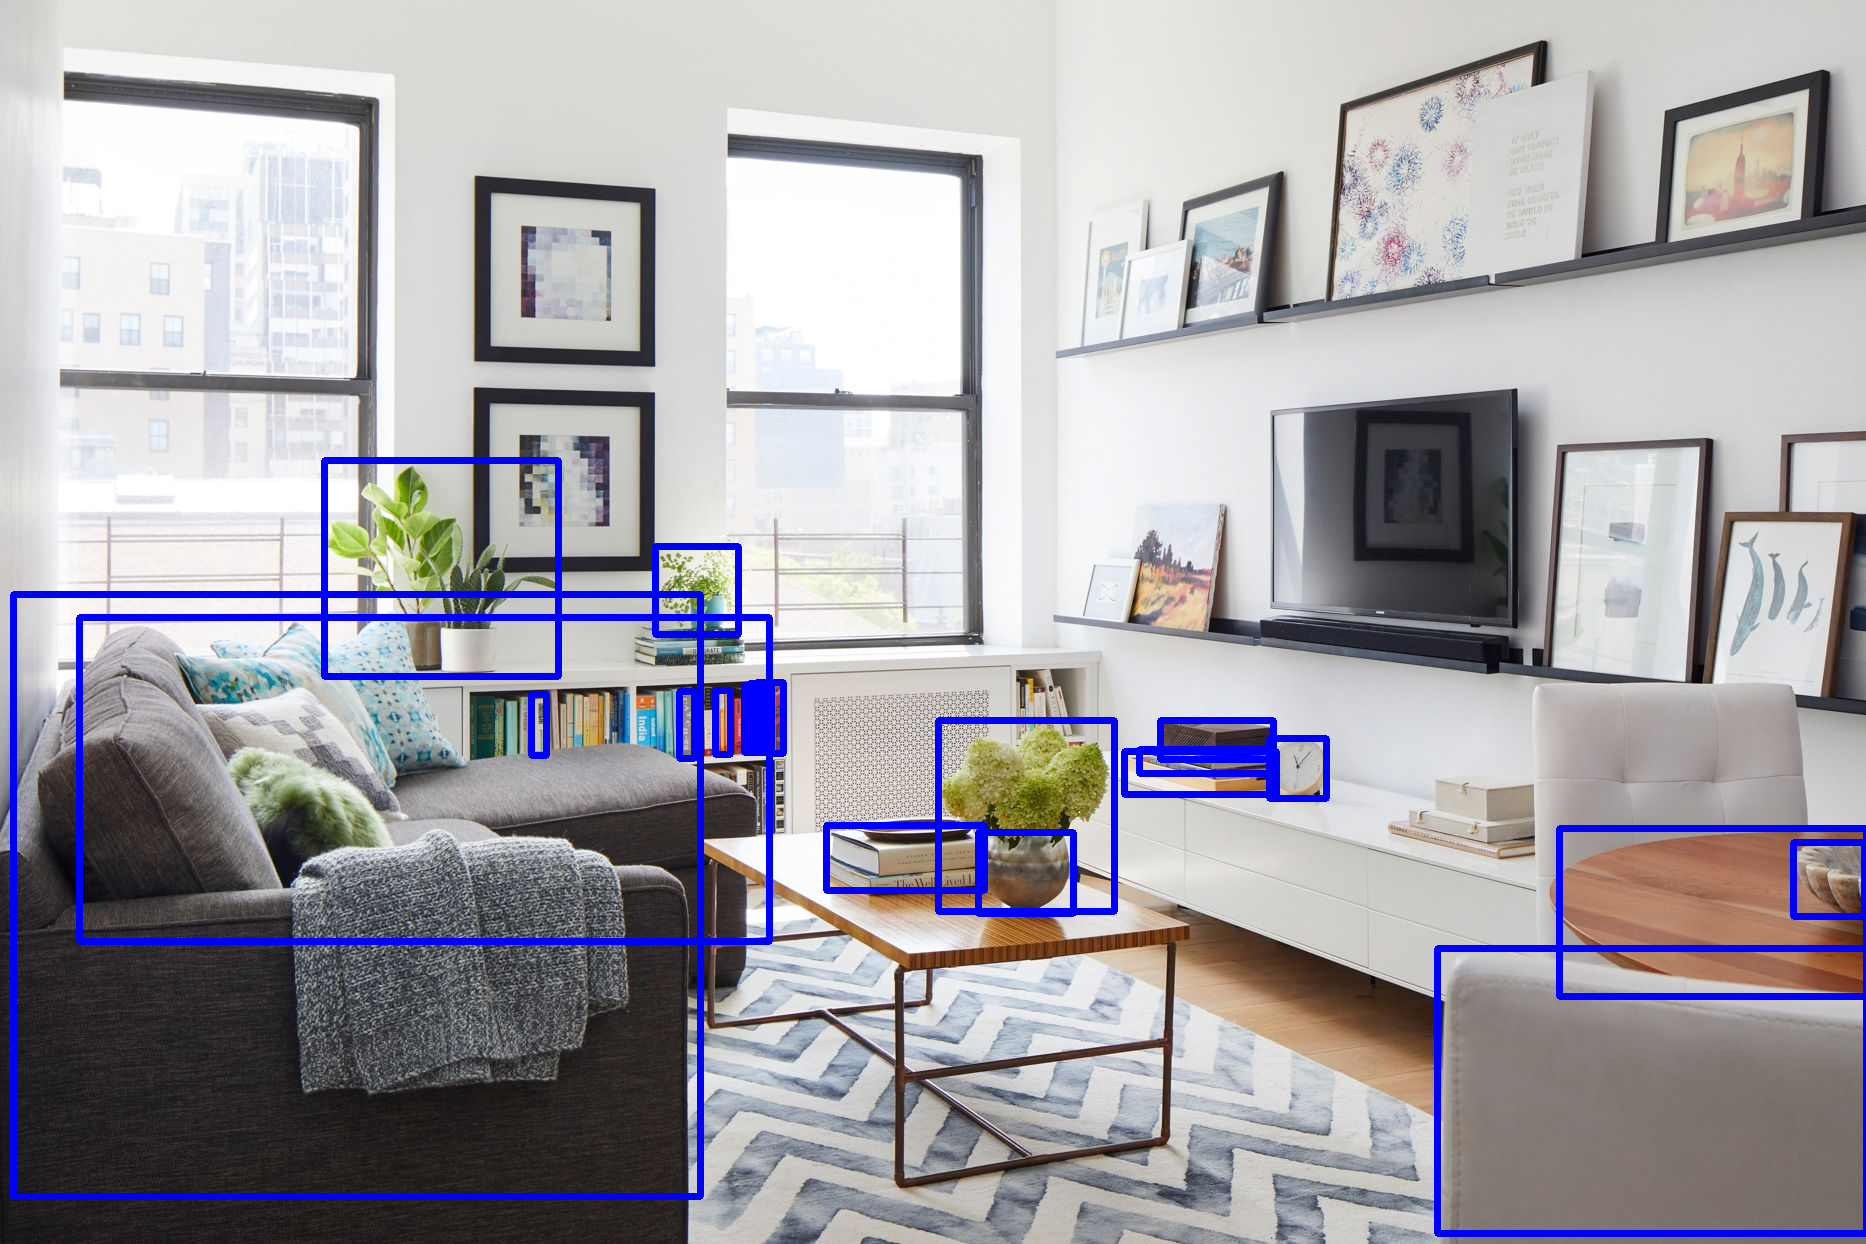

In [96]:
cv2_imshow(image)